# Module 1 Project: Novel Movie Studio Analysis

Joe Buzzelli & Alphonso Woodbury

### Visualization development

In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import calendar
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

In [3]:
#import datasets
movies = pd.read_csv('/Users/alphonsowoodbury/DS/code/Projects/DCDS-MOD1---MS-Movies/data/processed/movies')

In [4]:
movies.head(50)

,Unnamed: 0,Title,Year,release_month,Rated,Runtime,Metascore,imdbRating,imdbVotes,production_budget,domestic_gross,domestic_profit,genres,primary_genre,secondary_genre,tertiary_genre,film_type,imdbID
0,0,Star Wars: Episode VII - The Force Awakens,2015,Dec,PG-13,138 min,81.0,7.9,"826,625",306000000,936662225,630662225,"Action,Adventure,Fantasy",Action,Adventure,Fantasy,Action/Adventure,tt2488496
1,1,Black Panther,2018,Feb,PG-13,134 min,88.0,7.3,"565,951",200000000,700059566,500059566,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Action/Adventure,tt1825683
2,2,Jurassic World,2015,Jun,PG-13,124 min,59.0,7.0,"556,312",215000000,652270625,437270625,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Action/Adventure,tt0369610
3,3,Incredibles 2,2018,Jun,PG,118 min,80.0,7.6,"225,556",200000000,608581744,408581744,"Action,Adventure,Animation",Action,Adventure,Animation,Action/Adventure,tt3606756
4,4,Avengers: Infinity War,2018,Apr,PG-13,149 min,68.0,8.5,"748,996",300000000,678815482,378815482,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Action/Adventure,tt4154756
5,5,Beauty and the Beast,2017,Mar,PG,129 min,65.0,7.1,"253,795",160000000,504014165,344014165,"Family,Fantasy,Musical",Family,Fantasy,Musical,Not Action/Adventure,tt2771200
6,6,Rogue One: A Star Wars Story,2016,Dec,PG-13,133 min,65.0,7.8,"519,590",200000000,532177324,332177324,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Action/Adventure,tt3748528
7,7,Jumanji: Welcome to the Jungle,2017,Dec,PG-13,119 min,58.0,6.9,"284,295",90000000,404508916,314508916,"Action,Adventure,Comedy",Action,Adventure,Comedy,Action/Adventure,tt2283362
8,8,Deadpool,2016,Feb,R,108 min,65.0,8.0,"857,421",58000000,363070709,305070709,"Action,Adventure,Comedy",Action,Adventure,Comedy,Action/Adventure,tt1431045
9,9,Star Wars: Episode VIII - The Last Jedi,2017,Dec,PG-13,152 min,85.0,7.0,"524,507",317000000,620181382,303181382,"Action,Adventure,Fantasy",Action,Adventure,Fantasy,Action/Adventure,tt2527336


### Viz 1: Genre analysis

#### 1A - Top 50 profitable films genres (unsplit)

In [5]:
genres_counts = movies['genres'].value_counts()
genres_counts = genres_counts.sort_values(ascending=True)

#populate series for plots
genres   = genres_counts.keys()
counts   = genres_counts.values

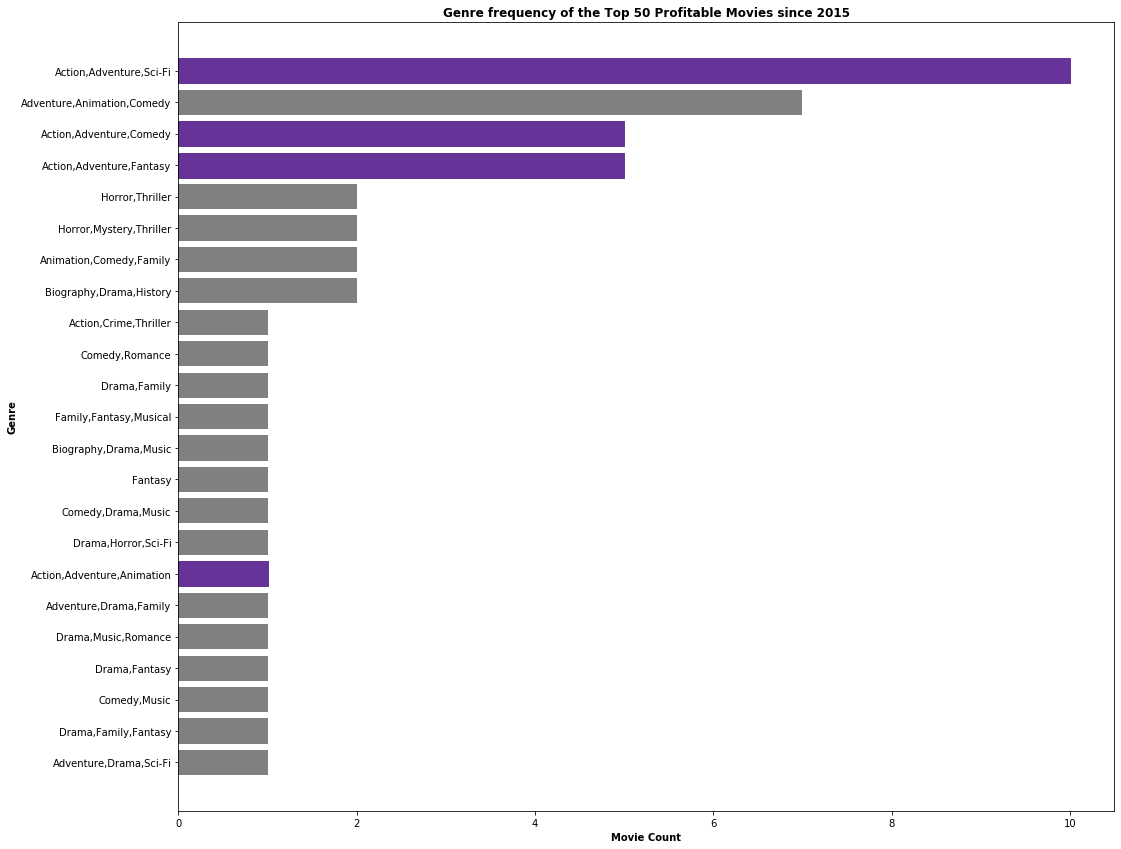

In [17]:
plt.figure(figsize=(20,15)) 

ax1 = plt.barh(genres, counts, color='grey')
#plt.text(0.05, 0.95, '23', transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
props = dict(boxstyle='round', facecolor='grey', alpha=0.5)


plt.title('Genre frequency of the Top 50 Profitable Movies since 2015',fontweight='bold')
plt.xlabel("Movie Count",fontweight='bold')
plt.ylabel("Genre",fontweight='bold')

ax1[-1].set_color('rebeccapurple') 
ax1[-3].set_color('rebeccapurple')#this is indicating an Action/adventure film ^^ VV
ax1[-4].set_color('rebeccapurple')
ax1[6].set_color('rebeccapurple')

plt.gcf().subplots_adjust(bottom=0.15,left=0.25)

plt.savefig('genrecounts.png')
plt.show()

### 2A - Action/Adventure ROI

In [8]:
AA_counts = movies['film_type'].value_counts()
count = AA_counts.sum()

In [9]:
aaprofit = movies.groupby(movies['film_type']).sum()
aaprofit['ROI'] = aaprofit['domestic_profit']/aaprofit['production_budget']
aaprofit

,Unnamed: 0,Year,Metascore,imdbRating,production_budget,domestic_gross,domestic_profit,ROI
film_type,,,,,,,,
Action/Adventure,372,42355,1448.0,154.3,4121600000,9925777338,5804177338,1.408234
Not Action/Adventure,853,58482,1965.0,210.5,2122000000,7282077028,5160077028,2.431705


### 2B: Budget vs Profit 

In [10]:
profitscatterbyaa = movies[['film_type','production_budget','domestic_profit']]

In [11]:
#create series for action/adventure provits vs production budget
aaprofitscatter = profitscatterbyaa[profitscatterbyaa['film_type'] == 'Action/Adventure']
aaprod = aaprofitscatter['production_budget']
aaprof = aaprofitscatter['domestic_profit']

In [12]:
#create series for non-action/adventure provits vs production budget
naaprofitscatter = profitscatterbyaa[profitscatterbyaa['film_type'] == 'Not Action/Adventure']
naaprod = naaprofitscatter['production_budget']
naaprof = naaprofitscatter['domestic_profit']

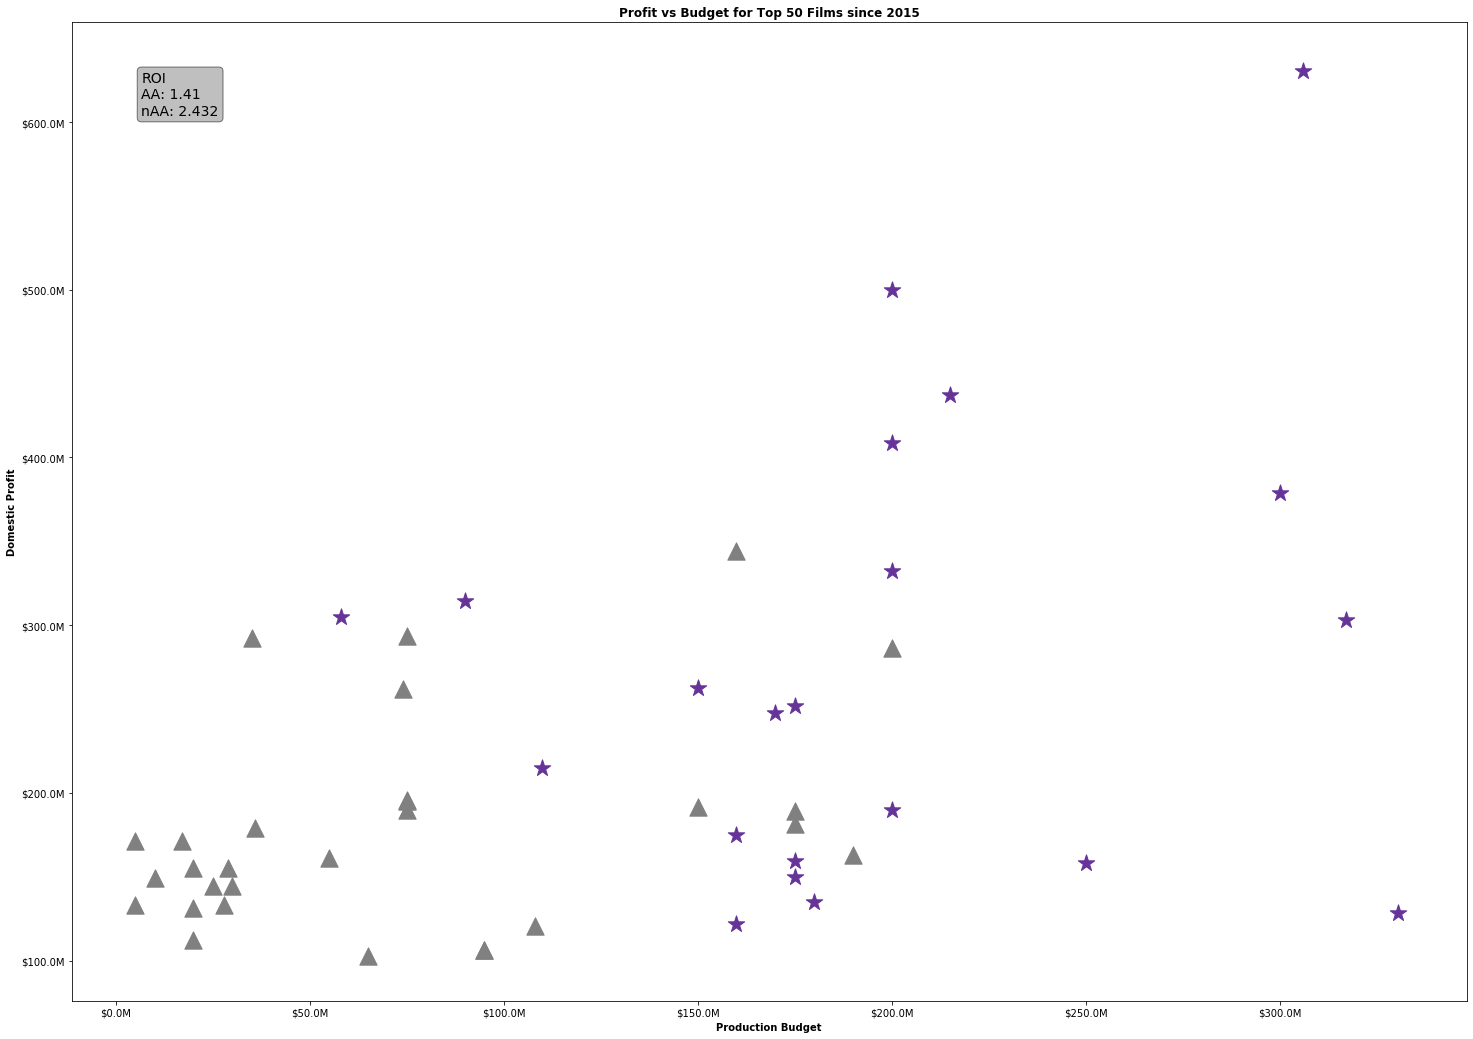

In [16]:
#prepare plot to indicate '$' in millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)

props = dict(boxstyle='round', facecolor='grey', alpha=0.5)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots(figsize=(25,18))
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

plt.scatter(naaprod,naaprof, marker="^",s=300,c='grey') 
plt.scatter(aaprod,aaprof,marker="*",s=300,c='rebeccapurple') 

ax.text(0.05, 0.95, 'ROI\nAA: 1.41\nnAA: 2.432', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.title('Profit vs Budget for Top 50 Films since 2015',fontweight='bold')
plt.xlabel('Production Budget',fontweight='bold')
plt.ylabel('Domestic Profit',fontweight='bold')

plt.savefig('budgetprofitscatter.png')
plt.show()